# Computational Intelligence in Chemistry - Hands-on dataset analysis

## Needed packages

In [1]:
!pip install --quiet rdkit

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

## 1. Load and unpack QM9 dataset

In [3]:
!wget -O data.xyz.tar.bz2 https://www.dropbox.com/scl/fi/2ugqxr9fa9nob1byc8ura/dsgdb9nsd.xyz.tar.bz2?rlkey=pp2k6fy4360yldrypwghwbi6d&st=1cohswqh&dl=0

In [11]:
!mkdir qm9_files
!tar -xjf ../data.tar.bz2 -C qm9_files/

mkdir: cannot create directory ‘qm9_files’: File exists


## 2. Open XYZ files and extract the properties and SMILES

In [12]:
qm9_folder = 'qm9_files/'
QM9_PROPERTIES = [
    "A", 'B', 'C', 'mu', 'alpha',
    'homo', 'lumo', 'gap', 'r2',
    'zpve', 'U0', 'U', 'H', 'G', 'Cv'
]

with open(qm9_folder+'dsgdb9nsd_113885.xyz') as file:
  for line in file:
    print(line)

19

gdb 113885	3.70802	0.80999	0.7081	2.6975	73.65	-0.2639	0.0141	0.278	1593.5236	0.156316	-460.174889	-460.164623	-460.163679	-460.212278	35.326	

C	-0.008898706	 1.435343511	-0.1229342875	-0.480889

C	-0.097211668	-0.0611740136	 0.0533750899	 0.431334

O	-0.522805097	-0.6329577977	 1.0223608396	-0.34442

O	 0.3874153201	-0.692641184	-1.0454419183	-0.247509

C	 0.3502508225	-2.1099666389	-1.0216443391	 0.118249

C	-0.6452778548	-2.8049992501	-1.9010293635	-0.305338

C	 0.8299955957	-2.806393386	-2.257736521	-0.04378

C	 1.3090797685	-2.0281448361	-3.4552388748	-0.093611

O	 1.0953742585	-2.8320000843	-4.6085691448	-0.419869

H	-0.3728027153	 1.9278328937	 0.7777832851	 0.149542

H	 1.0248947898	 1.7315350968	-0.3210999853	 0.149596

H	-0.6070917791	 1.7459702376	-0.9844780335	 0.149165

H	 0.576972916	-2.5190329042	-0.0453019279	 0.12476

H	-1.1102986284	-3.7153217605	-1.5406769745	 0.122235

H	-1.2860640388	-2.1730656326	-2.5065209428	 0.123942

H	 1.3703384329	-3.7344941519	-2.09474

In [13]:
def load_validate_mol(file):
  with open(file, 'r') as file:
    n_atoms = int(file.readline())

    properties_list = file.readline().split()
    mol_id = properties_list[1]
    properties_values = [float(prop) for prop in properties_list[2:]]

    atoms = []
    for nlines in range(n_atoms):
      atom = file.readline().split()
      atoms.append(atom[0]) # get only the the atom string

      # Since we doesn't need coordinates for this assignment, we will ignore it for now
      # atom_coords = atom[1:3]
      # atom_coords = [float(coord) for coord in atom_coords]
      # print(atom)
    # print(atoms)
    file.readline() # ignores the frequencies

    smiles_list = file.readline().split()
    properties_dict = dict(zip(QM9_PROPERTIES, properties_values))


    mol = Chem.MolFromSmiles(smiles_list[0]) # If it's None then smiles is invalid
    if mol is None:
        print("Invalid smiles for arquive: ", mol_id)
        return
    canon_smiles = Chem.CanonSmiles(smiles_list[0])


    molecule_data = {
                'id': mol_id,
                'n_atoms': n_atoms,
                'atom_list': atoms,
                'smiles': canon_smiles
            }
            # Adiciona as 12 propriedades ao dicionário principal
    molecule_data.update(properties_dict)
    return molecule_data


def get_full_dataset(folder):
  dataset_list = []
  # print(f"Lendo arquivos da pasta: {folder}")

  files_to_process = [f for f in os.listdir(folder) if f.endswith('.xyz')]
  for i, file in enumerate(files_to_process):

      if (i + 1) % 10000 == 0:
          print(f"  Processando arquivo {i+1}/{len(files_to_process)}...")

      file_path = os.path.join(folder, file)

      # Chama a função de processamento para um arquivo
      molecule_data = load_validate_mol(file_path)

      # Se a função retornou dados válidos (não None), adiciona à lista
      if molecule_data:
          dataset_list.append(molecule_data)
  return dataset_list




if __name__ == '__main__':
  full_dataset = get_full_dataset(qm9_folder)

  df = pd.DataFrame(full_dataset)
  # load_validate_mol(qm9_folder+'dsgdb9nsd_113885.xyz')

  Processando arquivo 10000/133885...
  Processando arquivo 20000/133885...
  Processando arquivo 30000/133885...
  Processando arquivo 40000/133885...
  Processando arquivo 50000/133885...
  Processando arquivo 60000/133885...
  Processando arquivo 70000/133885...
  Processando arquivo 80000/133885...
  Processando arquivo 90000/133885...
  Processando arquivo 100000/133885...
  Processando arquivo 110000/133885...
  Processando arquivo 120000/133885...
  Processando arquivo 130000/133885...


## 3. Creating the DataFrame

In [14]:
df.head(10)

,id,n_atoms,atom_list,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
0,24741,12,"[O, C, C, C, C, N, C, C, O, H, H, H]",C#CC(=O)c1ncco1,3.82396,1.27192,0.95445,2.8364,72.43,-0.2671,-0.0895,0.1776,1120.5408,0.077210,-435.486068,-435.478661,-435.477717,-435.518646,26.421
1,59013,18,"[C, C, O, C, C, N, C, O, C, H, H, H, H, H, H, ...",CC(O)C1=CNC(=O)C1,3.61630,0.95013,0.88882,4.2815,75.84,-0.2121,-0.0008,0.2113,1353.0529,0.146822,-439.132298,-439.123186,-439.122242,-439.166452,33.758
2,42891,17,"[N, C, N, C, C, C, C, C, O, H, H, H, H, H, H, ...",N=C1N2CC2C12CCO2,2.92914,1.57965,1.28871,3.2970,73.68,-0.2413,-0.0076,0.2337,1016.4167,0.136524,-417.938580,-417.930940,-417.929996,-417.971120,28.931
3,94738,19,"[C, C, O, C, C, O, C, O, C, H, H, H, H, H, H, ...",CC1OCC2(O)COC12,2.74888,1.55133,1.26997,2.0216,70.81,-0.2498,0.0517,0.3015,1055.6243,0.158836,-460.147456,-460.139036,-460.138092,-460.180167,32.230
4,34702,15,"[N, C, C, C, C, C, C, C, N, H, H, H, H, H, H]",N#CC1C2C3C1N1C2C31,5.18897,1.33325,1.31918,3.3817,71.48,-0.2512,0.0216,0.2728,950.8314,0.114945,-379.590819,-379.584660,-379.583716,-379.621414,24.793
5,104569,17,"[C, O, C, C, C, O, C, C, O, H, H, H, H, H, H, ...",COC1(C=O)CC(=O)C1,2.28712,1.34416,1.03622,3.0559,70.09,-0.2536,-0.0446,0.2090,1184.9168,0.131680,-458.963654,-458.954381,-458.953437,-458.998625,33.071
6,115544,19,"[C, N, C, C, C, C, O, C, N, H, H, H, H, H, H, ...",CNC1CCC1(O)C#N,2.42678,1.20094,1.03106,4.1647,77.16,-0.2242,0.0161,0.2403,1260.9067,0.158523,-419.193679,-419.184112,-419.183168,-419.228015,35.154
7,39085,19,"[C, C, C, O, C, C, C, C, C, H, H, H, H, H, H, ...",C1=CC23CCC(O2)C3C1,3.23662,1.67484,1.58608,1.9673,78.98,-0.2374,0.0058,0.2432,933.4431,0.162369,-385.838216,-385.831738,-385.830794,-385.868592,28.037
8,100196,22,"[C, C, C, C, C, O, N, C, C, H, H, H, H, H, H, ...",CCC(C)(C=O)N1CC1,2.28526,1.28161,1.16821,1.7287,83.03,-0.2172,-0.0286,0.1886,1238.5059,0.191069,-404.324774,-404.314382,-404.313437,-404.360393,38.015
9,73596,19,"[C, C, C, C, C, N, C, C, N, H, H, H, H, H, H, ...",CC12CCCN1C2C#N,2.33901,1.62301,1.32362,3.3978,79.60,-0.2484,0.0125,0.2609,1060.6903,0.160638,-382.079051,-382.070702,-382.069758,-382.111734,31.916


## 4. Plotting all properties distributions

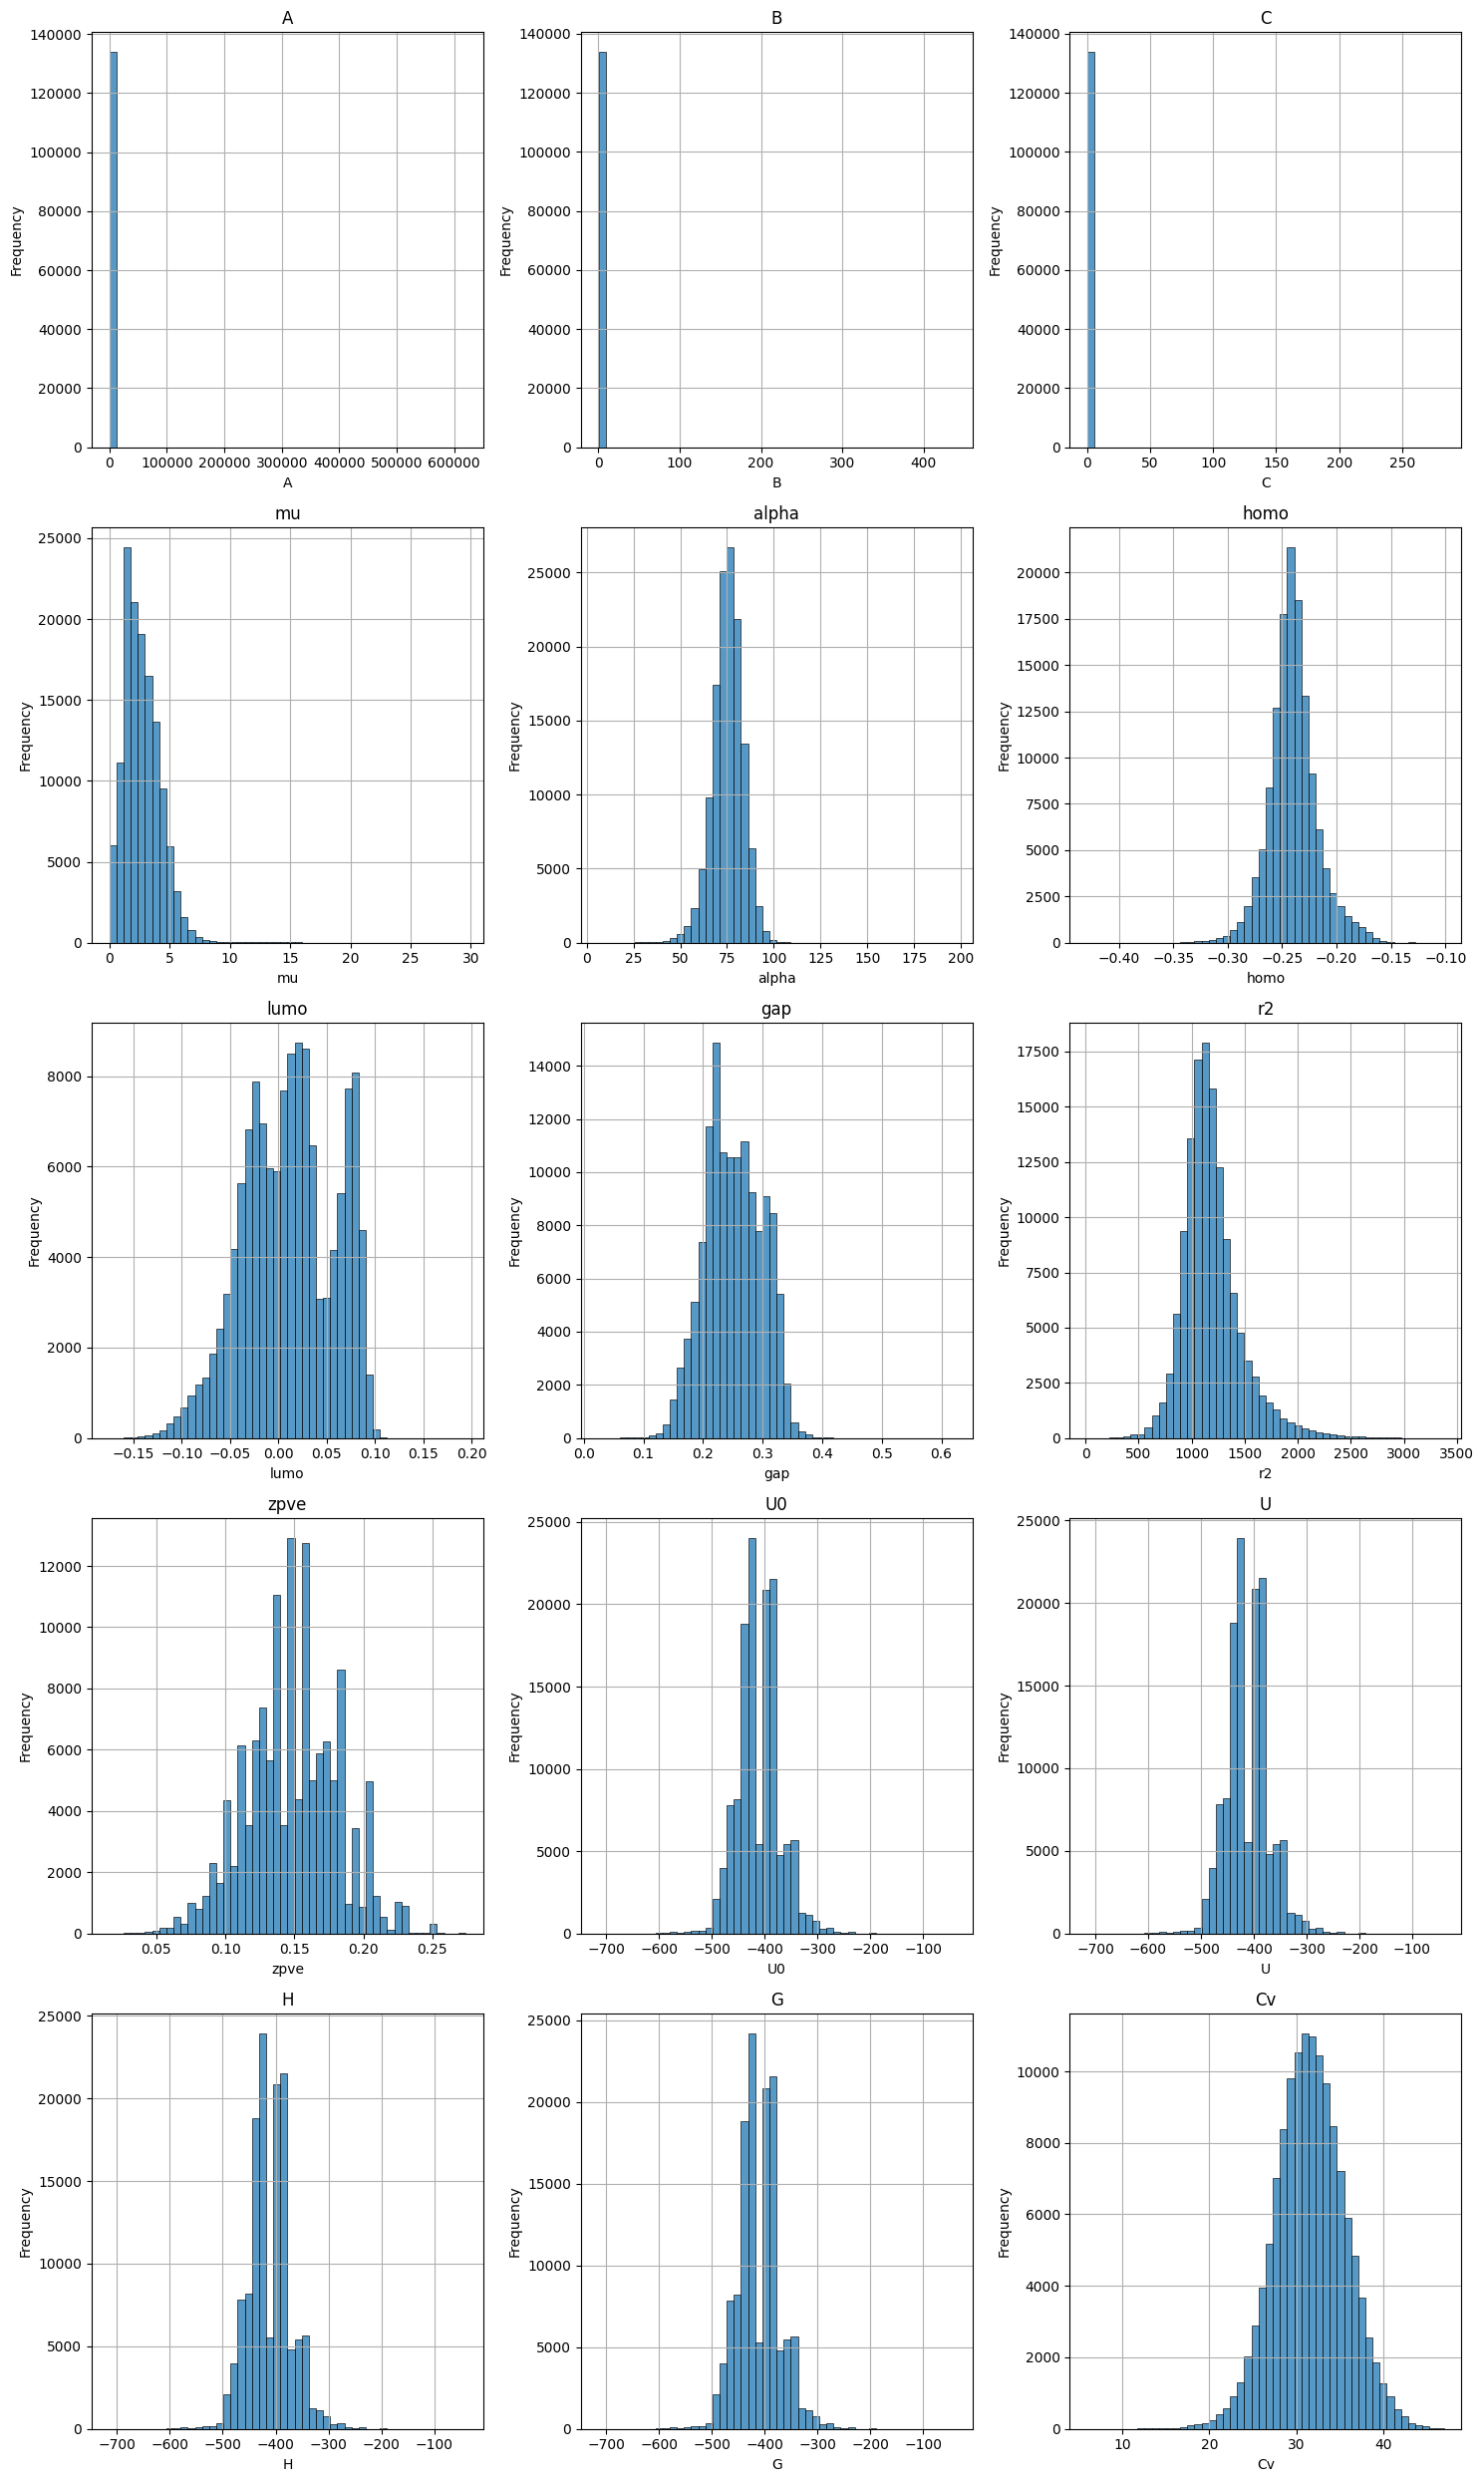

In [20]:
fig, axes = plt.subplots(5,3, figsize=(15,25))
axes = axes.flatten()
for i in range(15):
  axes[i].set_title(QM9_PROPERTIES[i])
  sns.histplot(df[QM9_PROPERTIES[i]], ax=axes[i], bins=50)
  axes[i].set_xlabel(QM9_PROPERTIES[i])
  axes[i].set_ylabel('Frequency')
  axes[i].grid(True)

plt.tight_layout()
plt.savefig('qm9_properties_histograms.png')

## 5. Plotting molecular composition and size

Histogram with number of chemical species in each molecule

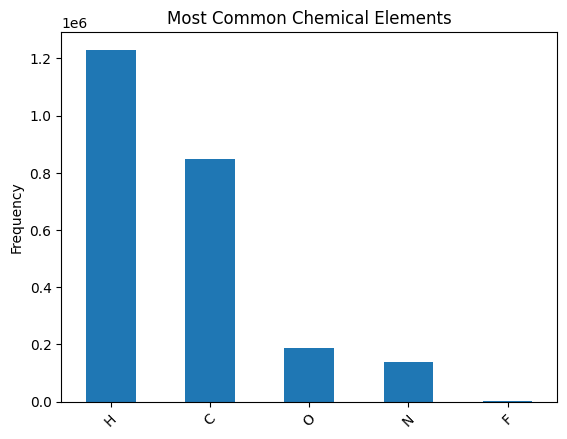

In [32]:
# Calculate the number of unique chemical species in each molecule
all_elements = []
for elem_list in df['atom_list']:
    all_elements.extend(elem_list)
element_counts = pd.Series(all_elements).value_counts()
element_counts.plot(kind='bar')
plt.title('Most Common Chemical Elements')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Histogram with molecular compositions 

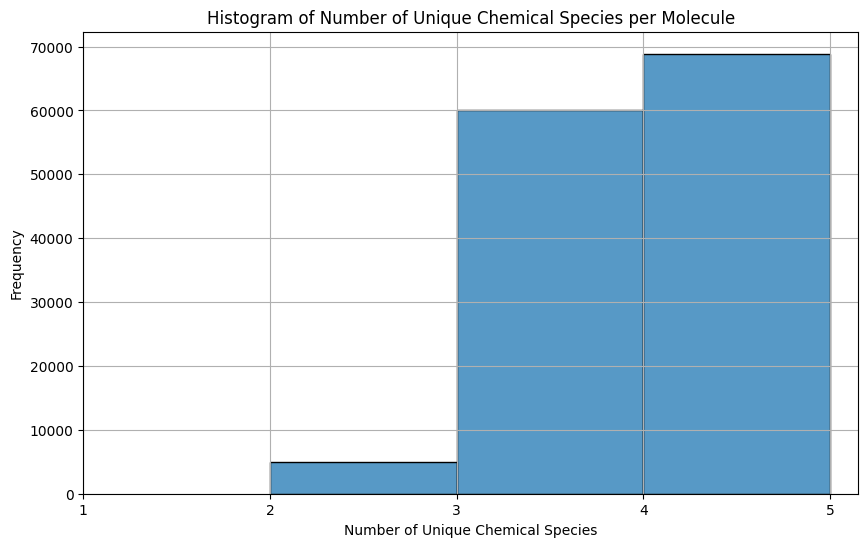

Min unique species: 2
Max unique species: 5
Mean unique species: 3.49
Most common number of unique species: 4


In [35]:
df['n_unique_species'] = df['atom_list'].apply(lambda x: len(set(x)))

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['n_unique_species'], binwidth=1, kde=False)
plt.title('Histogram of Number of Unique Chemical Species per Molecule')
plt.xlabel('Number of Unique Chemical Species')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(1, df['n_unique_species'].max() + 1))
plt.savefig('unique_species_histogram.png')
plt.show()

# Print some statistics
print(f"Min unique species: {df['n_unique_species'].min()}")
print(f"Max unique species: {df['n_unique_species'].max()}")
print(f"Mean unique species: {df['n_unique_species'].mean():.2f}")
print(f"Most common number of unique species: {df['n_unique_species'].mode()[0]}")

Histogram with number of chemical specie

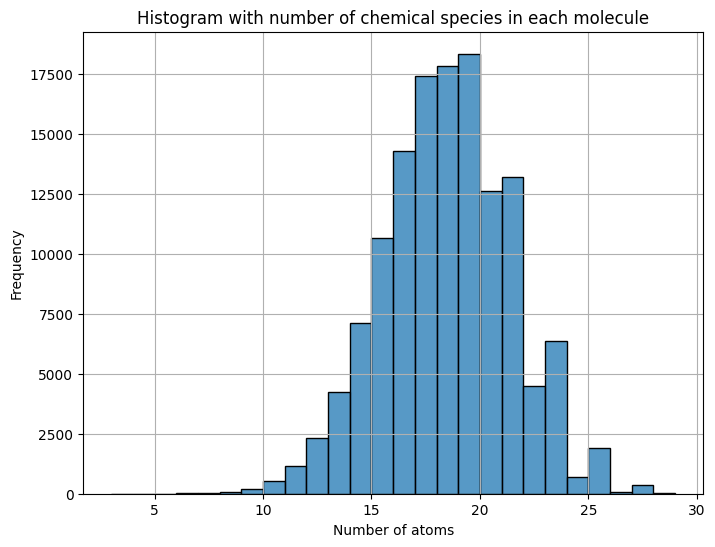

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df['n_atoms'], binwidth=1, kde=False)
plt.title('Histogram with number of chemical species in each molecule')
plt.xlabel('Number of atoms')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('n_atoms_histogram.png')

## 6. Correlation analysis

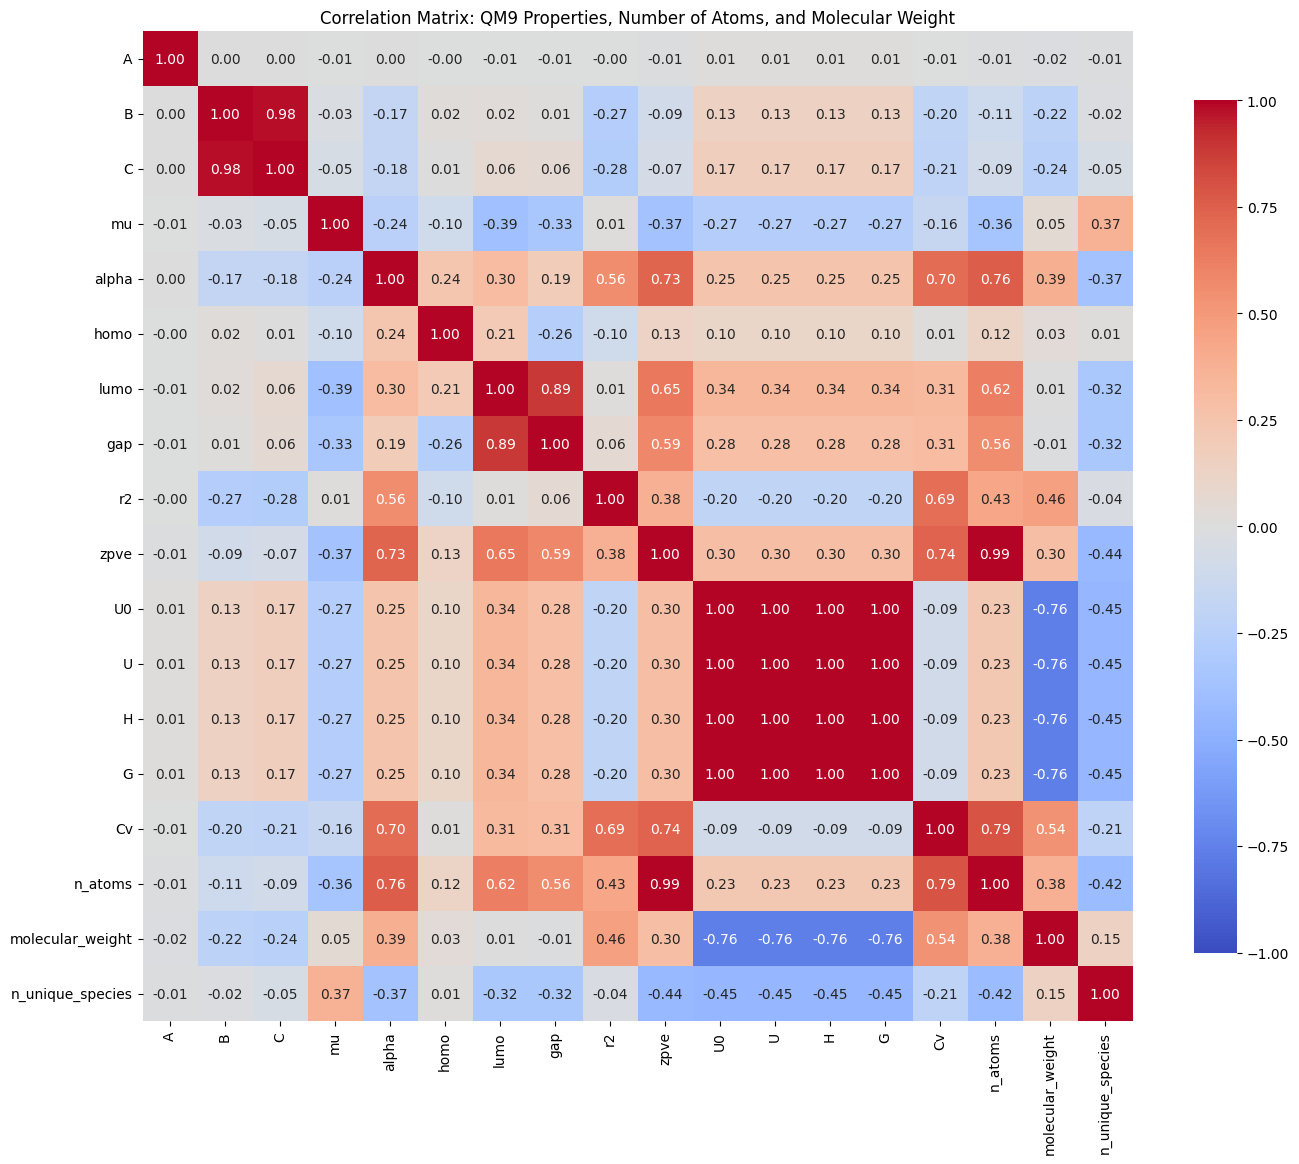

Strongest positive correlations (> 0.7):
B - C: 0.981
alpha - zpve: 0.732
alpha - n_atoms: 0.763
lumo - gap: 0.890
zpve - Cv: 0.740
zpve - n_atoms: 0.994
U0 - U: 1.000
U0 - H: 1.000
U0 - G: 1.000
U - H: 1.000
U - G: 1.000
H - G: 1.000
Cv - n_atoms: 0.790

Strongest negative correlations (< -0.7):
U0 - molecular_weight: -0.760
U - molecular_weight: -0.760
H - molecular_weight: -0.760
G - molecular_weight: -0.760

Correlations with number of atoms:
n_atoms - A: -0.012
n_atoms - B: -0.114
n_atoms - C: -0.094
n_atoms - mu: -0.359
n_atoms - alpha: 0.763
n_atoms - homo: 0.118
n_atoms - lumo: 0.621
n_atoms - gap: 0.558
n_atoms - r2: 0.433
n_atoms - zpve: 0.994
n_atoms - U0: 0.225
n_atoms - U: 0.225
n_atoms - H: 0.225
n_atoms - G: 0.225
n_atoms - Cv: 0.790
n_atoms - molecular_weight: 0.377

Correlations with molecular weight:
molecular_weight - A: -0.020
molecular_weight - B: -0.220
molecular_weight - C: -0.242
molecular_weight - mu: 0.053
molecular_weight - alpha: 0.385
molecular_weight - hom

In [37]:
from rdkit.Chem import Descriptors

# Calculate molecular weight for each molecule
df['molecular_weight'] = df['smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))

# Select columns for correlation analysis
correlation_columns = QM9_PROPERTIES + ['n_atoms', 'molecular_weight', 'n_unique_species']
correlation_df = df[correlation_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Matrix: QM9 Properties, Number of Atoms, and Molecular Weight')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print strongest correlations
print("Strongest positive correlations (> 0.7):")
strong_positive = correlation_matrix[correlation_matrix > 0.7]
for i in range(len(strong_positive.columns)):
    for j in range(i+1, len(strong_positive.columns)):
        corr_val = strong_positive.iloc[i, j]
        if not pd.isna(corr_val):
            print(f"{strong_positive.columns[i]} - {strong_positive.columns[j]}: {corr_val:.3f}")

print("\nStrongest negative correlations (< -0.7):")
strong_negative = correlation_matrix[correlation_matrix < -0.7]
for i in range(len(strong_negative.columns)):
    for j in range(i+1, len(strong_negative.columns)):
        corr_val = strong_negative.iloc[i, j]
        if not pd.isna(corr_val):
            print(f"{strong_negative.columns[i]} - {strong_negative.columns[j]}: {corr_val:.3f}")

# Specific correlations with molecular size
print(f"\nCorrelations with number of atoms:")
for prop in QM9_PROPERTIES + ['molecular_weight']:
    corr = correlation_matrix.loc['n_atoms', prop]
    print(f"n_atoms - {prop}: {corr:.3f}")

print(f"\nCorrelations with molecular weight:")
for prop in QM9_PROPERTIES + ['n_atoms']:
    corr = correlation_matrix.loc['molecular_weight', prop]
    print(f"molecular_weight - {prop}: {corr:.3f}")